# CITS4403 Project
Dylan Bell 21711951 <br>
Ryan Hodgson <br>
Harry Brooker <br>
James Tambakis <br>


## Error and attack tolerance of complex networks
Reka Albert, Hawoong Jeong & Albert-Laszlo Barabasi

In [78]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

We use the same seed throughout to ensure we can replicated results.

In [79]:
seed = 123
random.seed(seed)
np.random.seed(seed)

## Introduction 

(INTRODUCTION OF THE PAPER)

The two graphs that are explored in this paper are the random graph models of Erdos and Renyi and the small-world model of Watts and Strofatz. (EXPLAIN WHAT THESE ARE)

### Erdos Renyi Graph Model

Explanation

Create an ER graph using NetworkX ER_graph function. Input is nodes (N), probability (p) that each node is connected and seed. Output is a NetworkX Erdos-Renyi Graph.

In [80]:
def create_ER_graph(N, p, seed):
    return nx.erdos_renyi_graph(N, p, seed)

(Maybe use some other visualisation tool like in the paper to show the network) <br>
We create a Erdos-Renyi graph with 50 nodes and P of 0.1 

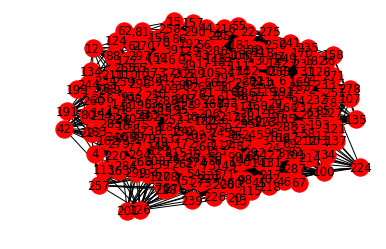

In [81]:
N = 300
P = 0.1
ER_graph = create_ER_graph(N, P, seed)
limits = plt.axis('off')
nx.draw_networkx(ER_graph)


### Scale Free Graph Model

(EXPLANATION)

Here we create a Barabasi-Albert using the NetworkX barabasi_albert_graph function. The inputs are Nodes (N), the nmber of edges to attach from a new node to existing nodes (M) and seed. The output is a NetworkX Barabasi-Albert graph.

In [83]:
def SF_graph(N, M, seed):
    return nx.barabasi_albert_graph(N, M, seed)

We create a scale free graph with N = 300 and M = 7.

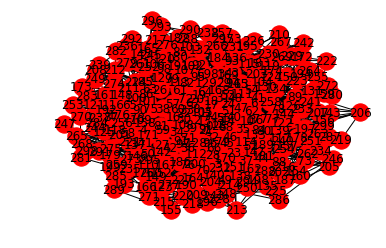

In [84]:
N = 300
M = 7
SF_graph = SF_graph(N, M, seed)
limits = plt.axis('off')
nx.draw_networkx(SF_graph)

## Experiment 1

### Failure 

(Explanation)

This creates a list of the % of nodes to remove. (GET SOME WEIRD ROUNDING SHIT HAPPENING SO MAY NEED TO FIX THAT)

In [85]:
remove_range = list(np.arange(0.005, 0.055, 0.005))
print (remove_range)

[0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.034999999999999996, 0.04, 0.045, 0.049999999999999996]


Generate failure takes in a graph and the list remove_range. It then removes, at random, the % of nodes specificied in remove_range.

In [86]:
def random_nodes(G, f):
    G_local = G.copy()

    N = len(G_local.nodes)
    delete_amount = int(N * f)
    remove_nodes_list = random.sample(range(N - 1), delete_amount)

    for node in remove_nodes_list:
        G_local.remove_node(node)
    
    return G_local

(EXPLANATION)

In [87]:
def get_diameter(G):
    return nx.average_shortest_path_length(G)

(EXPLANATION)

In [88]:
def generate_failure(G, remove_range):
    diameters = []

    for f in remove_range:
        deleted_graph = random_nodes(G, f)
        recalculated_diameter = get_diameter(deleted_graph)
        diameters.append(recalculated_diameter)

    return diameters




(EXPLANATION)

In [89]:
ER_failure_diameters = generate_failure(ER_graph, remove_range)
SF_failure_diameters = generate_failure(SF_graph, remove_range)

### Attack

(Explanation)

(EXPLANATION)

In [90]:
def get_most_connected_nodes(G):
    degrees = list(G.degree)
    degrees.sort(key=lambda tup: tup[1], reverse=True)
    return degrees

(EXPLANATION)

In [91]:
def delete_connected_nodes(G, f, L):          
    G_local = G.copy()

    N = len(G_local.nodes)
    delete_amount = int(N * f)
    count = 1

    for (node, _) in L:
        G_local.remove_node(node)
            
        if count >= delete_amount:
            break
        else:
            count = count + 1

    return G_local

(EXPLANATION)

In [92]:
def generate_attack(G, remove_range):
    connected_nodes_list = get_most_connected_nodes(G) 
    diameters = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        recalculated_diameter = get_diameter(modified_graph)
        diameters.append(recalculated_diameter)

    return diameters

(EXPLANATION)

In [93]:
ER_attack_diameters = generate_attack(ER_graph, remove_range)
SF_attack_diameters = generate_attack(SF_graph, remove_range)

### Graph

(EXPLANATION)

In [94]:
def generate_graph(x, graph_data):
    plt.plot(x, graph_data[0], marker='^', label="ER Failure", color="b")
    plt.plot(x, graph_data[1], marker='D', label="ER Attack", color="r")
    plt.plot(x, graph_data[2], marker='s', label="SF Failure",color="b")
    plt.plot(x, graph_data[3], marker='o', label="SF Attack",color="r")   
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('Diameter d')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On SF & ER Graph")
    plt.show()

(EXPLANATION)

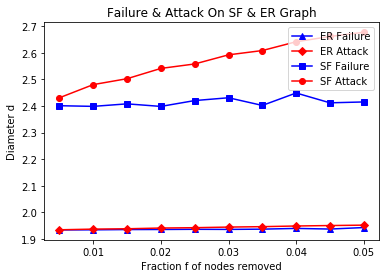

In [95]:
graph_data = [ER_failure_diameters, ER_attack_diameters, SF_failure_diameters, SF_attack_diameters]
generate_graph(remove_range, graph_data)